In [ ]:
import numpy as np
import math
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [ ]:
def function(x):
  return (np.cos(x) + 6*3j*np.sin(2*x))

In [ ]:
def f(x):
  return np.exp(10j * x)*(np.cos(x) + 6*10j*np.sin(2*x))

In [ ]:
exact_result,_ = quad(f, 0, 5)
print("Built-in function integration result:", exact_result)


Built-in function integration result: 1.3832095488335767


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


In [ ]:
def trapezoidal_integration(f, a, b, n):
  h = (b - a) / n
  integral = 0.5 * (f(a) + f(b))

  for i in range(1, n):
    x = a + i * h
    integral += f(x)

  integral *= h
  return integral


In [ ]:
def integrate(f, a, b,n=1000):

  integral = trapezoidal_integration(f, a, b, n)
  return integral


In [ ]:
def other_integrate(f,a,b,n):
  d_x=(b-a)/n
  sum=0
  for i in range(1,n+1):
    sum+=f(a+(i-1)*d_x)*d_x
  return sum


In [ ]:
other_integrate(f, 0, 5,10000)

(-3.5520432262657544-1.2912789258753308j)

In [ ]:
def to_polar(complex_number):
  """
  Converts a complex number to polar form (magnitude, angle).

  Args:
      complex_number: The complex number to convert.

  Returns:
      A tuple containing the magnitude and angle of the complex number.
  """
  magnitude = abs(complex_number)
  angle = np.arctan2(complex_number.imag, complex_number.real)
  return magnitude, angle


In [ ]:

# Get user input for integration bounds
a = float(input("Enter lower bound: "))
b = float(input("Enter upper bound: "))

# Perform integration
result = integrate(f, a, b)

# Convert to polar form
magnitude, angle = to_polar(result)

# Print results
print("Integral in Cartesian form:", result)
print("Integral in polar form (magnitude, angle):", magnitude, angle)


Enter lower bound: 0
Enter upper bound: 5
Integral in Cartesian form: (-3.553767236679504-1.2998120576935768j)
Integral in polar form (magnitude, angle): 3.784015454226144 -2.790950746769084


In [ ]:
exact_result, _ = quad(f, a, b)

print("Numerical integration result:", result)
print("Built-in function integration result:", exact_result)
print("Absolute difference:", abs(result - exact_result))

Numerical integration result: (-3.553767236679504-1.2998120576935768j)
Built-in function integration result: -3.5543719034942605
Absolute difference: 1.2998121983377318


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


In [ ]:
import math

result = math.exp(1)

In [ ]:
result

2.718281828459045

##Trigonometric Fourier series

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(t):
    # Replace this with your actual function
    return np.piecewise(t, [0 <= t, t > np.pi], [lambda t: (t * np.pi)/2, lambda t: 0])


In [ ]:
T0 = 2*np.pi


In [ ]:
def fourier_coefficients(f, T0):
    a0 = (1/T0) * np.integrate.quad(lambda t: f(t), 0, T0)[0]
    an = np.zeros(infty)
    bn = np.zeros(infty)
    for n in range(1, infty):
        an[n] = (2/T0) * np.integrate.quad(lambda t: f(t) * np.cos(n * 2 * np.pi * t / T0), 0, T0)[0]
        bn[n] = (2/T0) * np.integrate.quad(lambda t: f(t) * np.sin(n * 2 * np.pi * t / T0), 0, T0)[0]
    return a0, an, bn


In [ ]:
def fourier_series(t, a0, an, bn):
    omega0 = 2 * np.pi / T0
    return a0/2 + sum(an * np.cos(n * omega0 * t) + bn * np.sin(n * omega0 * t) for n in range(1, infty))


In [ ]:
def fourier_coefficients(f, T0):
    a0 = (1/T0) * integrate(lambda t: f(t), 0, T0)
    an = np.zeros(5)
    bn = np.zeros(5)
    for n in range(1, 5):
        an[n] = (2/T0) * integrate(lambda t: f(t) * np.cos(n * 2 * np.pi * t / T0), 0, T0)
        bn[n] = (2/T0) * integrate(lambda t: f(t) * np.sin(n * 2 * np.pi * t / T0), 0, T0)
    return a0, an, bn

In [ ]:
def fourier_series(t, a0, an, bn):
    omega0 = 2 * np.pi / T0
    return a0/2 + sum(an * np.cos(n * omega0 * t) + bn * np.sin(n * omega0 * t) for n in range(1, 5))

In [ ]:
N = 50  # Number of terms to include in the summation


In [ ]:
t = np.linspace(0, T0, 1000)


In [ ]:
t = np.linspace(0, T0, 5)


In [ ]:
a0, an, bn = fourier_coefficients(f, T0)
x_fourier = fourier_series(t, a0, an[:N], bn[:N])


In [ ]:
x_fourier

array([0.61808398, 0.61808398, 0.61808398, 0.61808398, 0.63782318])

##task2

In [ ]:
def complex_function(x):
    return np.cos(x)+6j*np.sin(2*x)


def e(x):
    return np.cos(w*x)+1j*np.sin(w*x)

def function(x):
    return np.cos(x)+2*np.sin(2*x)

In [ ]:
def integrate(f,a,b,delta_x):
    x=a
    sum=0

    while(x<=b):
        sum+=(f(x))*delta_x
        x+=delta_x

    return sum

In [ ]:
a=1
b=5
w=3
n=10000
z=integrate(lambda x:(complex_function(x))*(e(x)),a,b,(b-a)/n)
print("{:.2f}".format(z))

5.74-1.22j


In [ ]:
T=1
dt=T/1000
w=2*np.pi/T
a0=integrate(lambda t: function(t),0,T,dt)/T

def get_an(n):
    return integrate(lambda t:  (function(t))* np.cos(n*t*w),0,T,dt)*(2/T)

def get_bn(n):
    return integrate(lambda t:  (function(t))* np.sin(n*t*w),0,T,dt)*(2/T)

an=[get_an(n) for n in range(1, 10)]
bn=[get_bn(n) for n in range(1, 10)]

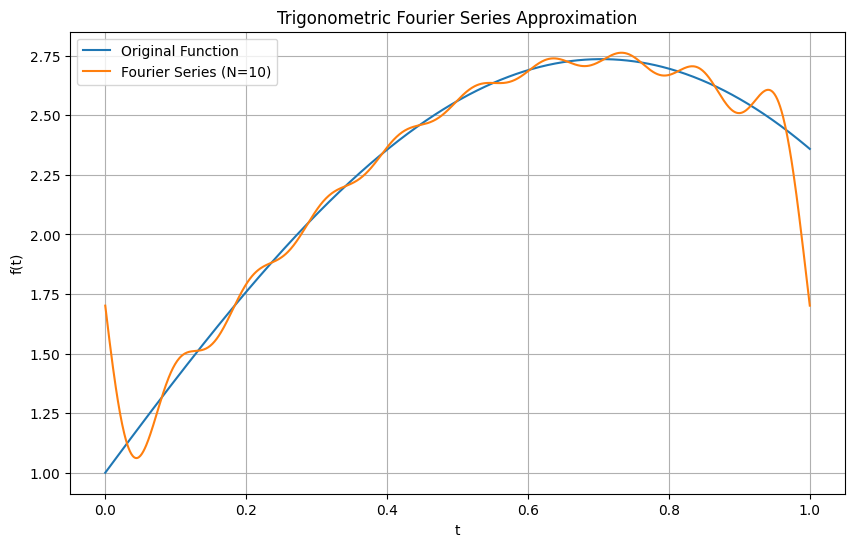

In [ ]:
t_a=np.linspace(0,T,1000)
values = np.zeros_like(t_a)
ts=[]

for a in t_a:
    ts.append( function(a))
a0 = a0.astype(values.dtype)
values+=a0
for n in range(1,10):
    values += an[n - 1] * np.cos(n * w  *t_a) + bn[n - 1] * np.sin(n * w  *t_a)

plt.figure(figsize=(10, 6))
plt.plot(t_a, ts, label='Original Function')
plt.plot(t_a, values, label='Fourier Series (N=10)')
plt.title('Trigonometric Fourier Series Approximation')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

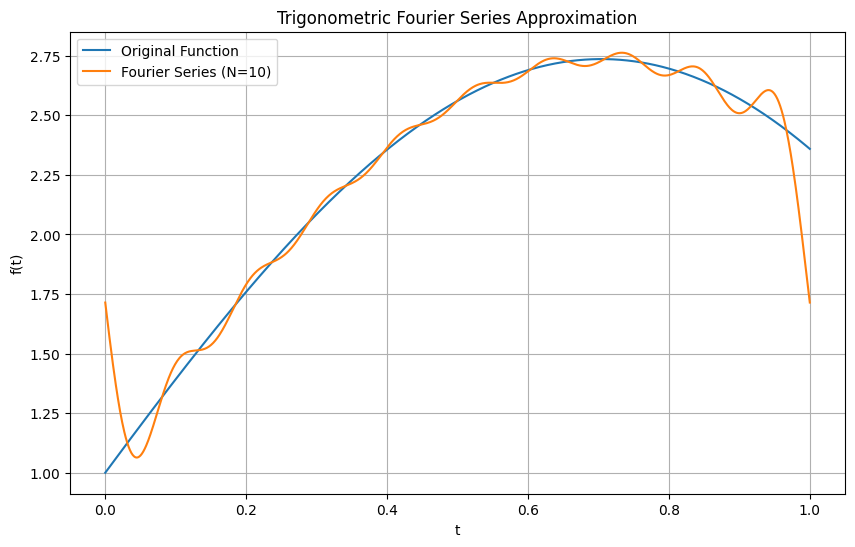

In [ ]:
def a0():
    return (1 / T) * np.trapz(function(t_a), t_a)

def an(n):
    integrand = function(t_a) * np.cos(n * w * t_a)
    return (2 / T) * np.trapz(integrand, t_a,dx=T/1000)

def bn(n):
    integrand = function(t_a) * np.sin(n * w * t_a)
    return (2 / T) * np.trapz(integrand, t_a)

a0_val = a0()
a_vals = [an(n)
 for n in range(1, 10)]
b_vals = [bn(n)
 for n in range(1, 10)]

def fourier_series(t, N):
    series = np.zeros_like(t)
    series += a0_val / T
    for n in range(1, N):
        series += a_vals[n - 1] * np.cos(n * w  *t) + b_vals[n - 1]*  np.sin(n * w  *t)
    return series

plt.figure(figsize=(10, 6))
plt.plot(t_a, function(t_a), label='Original Function')
plt.plot(t_a, fourier_series(t_a, 10), label='Fourier Series (N=10)')
plt.title('Trigonometric Fourier Series Approximation')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

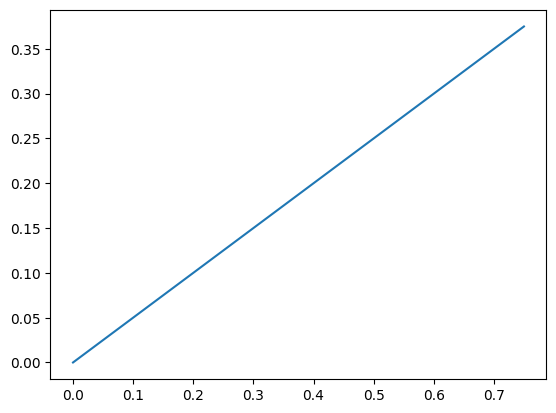

In [ ]:
plt.plot(ts, f, label='Original Function')


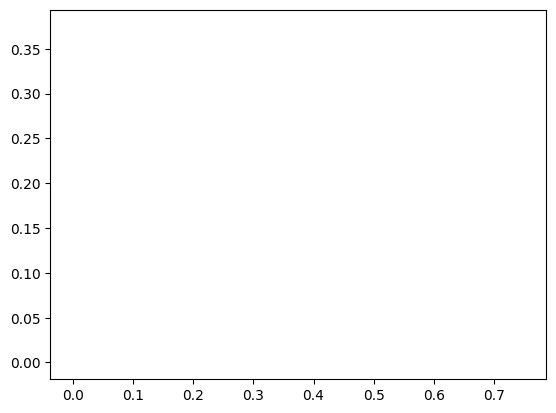

In [ ]:
for i in range(len(ts)):
  plt.plot(ts[i],f[i])

In [ ]:
a02=0